# Optimizers Evaluation (SGD, Adam, RMSprop, Adadelta, Adagrad)
---

### Compare the results of various optimizers on the CIFAR-10 dataset using KERAS.


_(Created with Google Colab. GPU Support - FloydHub)_

---

## Imports

In [1]:
from __future__ import print_function

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0)
import numpy as np

# Seed
np.random.seed(1)

## Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


### Visualize shapes

In [3]:
print('X_Train:\t', X_train.shape)
print('y_train:\t', y_train.shape)

print('X_test:\t\t', X_test.shape)
print('y_test:\t\t', y_test.shape)

input_shape = X_train[0].shape
print('\nInput Shape:\t', input_shape)

X_Train:	 (50000, 32, 32, 3)
y_train:	 (50000, 1)
X_test:		 (10000, 32, 32, 3)
y_test:		 (10000, 1)

Input Shape:	 (32, 32, 3)


### Print random samples


 [0]


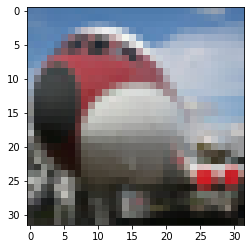


 [8]


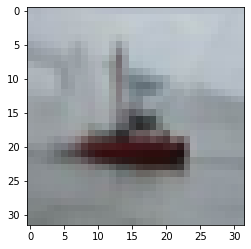


 [3]


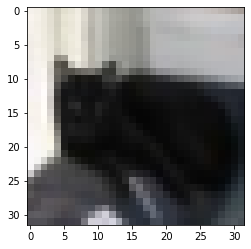


 [5]


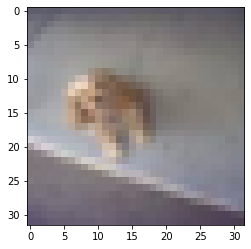


 [7]


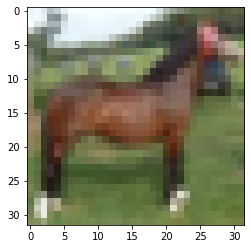

In [4]:
for i in np.random.randint(0, X_train.shape[0], 5):
    print('\n', y_train[i])
    plt.imshow(X_train[i])
    plt.show()

### Scaling of Data

In [5]:
# Scaling

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test /= 255

### Check image consistency after scaling


 [7]


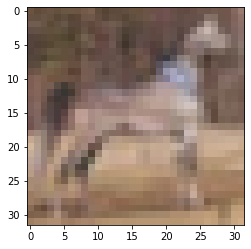


 [0]


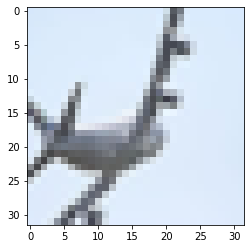


 [5]


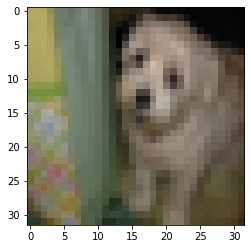


 [6]


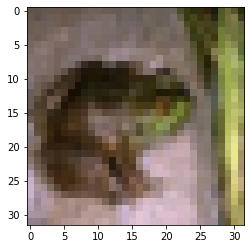


 [0]


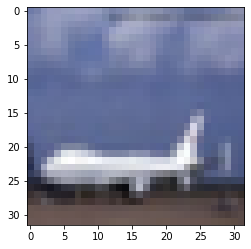


 [4]


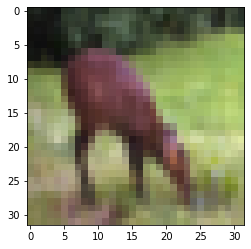


 [0]


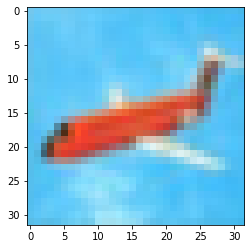


 [6]


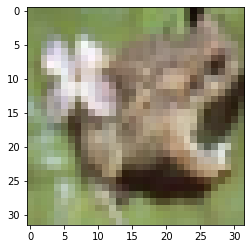


 [3]


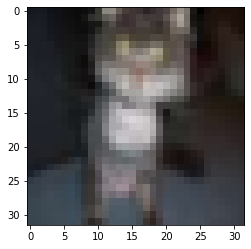


 [0]


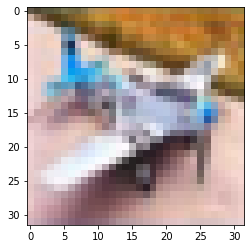

In [6]:
# Consistency check

for i in np.random.randint(0, X_train.shape[0], 10):
    print('\n', y_train[i])
    plt.imshow(X_train[i])
    plt.show()

## Define Model

In [7]:
def get_model():
    
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    
    print('Model initialized. Please compile before training.')
    
    return model

### Set basic hyperparameters

In [8]:
# Hyperparameters

batch_size = 128
epochs = 100

## Stochastic Gradient Descent
---

(Default parameters)

In [9]:
model_sgd_plain = get_model()

Model initialized. Please compile before training.


In [13]:
import tensorflow as tf
model_sgd_plain.summary()
sgd_plain = tf.keras.optimizers.SGD()
model_sgd_plain.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_plain, metrics=['accuracy'])
history_sgd_plain = model_sgd_plain.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

KeyboardInterrupt: ignored

In [ ]:
model_sgd_plain.save('model_sgd_plain.h5')

## ADAM
---
(Default parameters)

In [ ]:
model_adam = get_model()

In [ ]:
model_adam.summary()
adam = keras.optimizers.Adam()
model_adam.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

In [ ]:
model_adam.save('model_adam.h5')

## RMSprop
---
(Default parameters)

In [ ]:
model_rms = get_model()

In [ ]:
model_rms.summary()
rmsprop = keras.optimizers.RMSprop()
model_rms.compile(loss='sparse_categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
history_rmsprop = model_rms.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

In [ ]:
model_rms.save('model_rms.h5')

## Adadelta
---

(Default parameters)

In [ ]:
model_adadelta = get_model()

In [ ]:
model_adadelta.summary()
adadelta = keras.optimizers.Adadelta()
model_adadelta.compile(loss='sparse_categorical_crossentropy', optimizer=adadelta, metrics=['accuracy'])
history_adadelta = model_adadelta.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

In [ ]:
model_adadelta.save('model_adadelta.h5')

## Adagrad
---
(Default parameters)

In [ ]:
model_adagrad = get_model()

In [ ]:
model_adagrad.summary()
adagrad = keras.optimizers.Adagrad()
model_adagrad.compile(loss='sparse_categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
history_adagrad= model_adagrad.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

In [ ]:
model_adagrad.save('model_adagrad.h5')

## Combined Accuracy Plot
---

A comparison of accuracies of the optimizers.

In [ ]:
# Combined Training Accuracy Plot

plt.plot(history_sgd_plain.history['acc'])
plt.plot(history_adam.history['acc'])
plt.plot(history_rmsprop.history['acc'])
plt.plot(history_adadelta.history['acc'])
plt.plot(history_adagrad.history['acc'])

plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad'])
plt.savefig('Combined-Accuracy.jpg', dpi=200)

## Individual Metrics Plots

In [ ]:
# SGD
plt.plot(history_sgd_plain.history['acc'])
plt.plot(history_sgd_plain.history['val_acc'])
plt.title('SGD - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('SGD-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_sgd_plain.history['loss'])
plt.plot(history_sgd_plain.history['val_loss'])
plt.title('SGD - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('SGD-Loss.jpg')
plt.show()


# Adam
plt.plot(history_adam.history['acc'])
plt.plot(history_adam.history['val_acc'])
plt.title('Adam - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adam-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('Adam - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adam-Loss.jpg')
plt.show()

# RMSprop
plt.plot(history_rmsprop.history['acc'])
plt.plot(history_rmsprop.history['val_acc'])
plt.title('RMSprop - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('RMSprop-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_rmsprop.history['loss'])
plt.plot(history_rmsprop.history['val_loss'])
plt.title('RMSprop - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('RMSprop-Loss.jpg')
plt.show()

# Adadelta
plt.plot(history_adadelta.history['acc'])
plt.plot(history_adadelta.history['val_acc'])
plt.title('Adadelta - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adadelta-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_adadelta.history['loss'])
plt.plot(history_adadelta.history['val_loss'])
plt.title('Adadelta - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adadelta-Loss.jpg')
plt.show()

# Adagrad
plt.plot(history_adagrad.history['acc'])
plt.plot(history_adagrad.history['val_acc'])
plt.title('Adagrad - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adagrad-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_adagrad.history['loss'])
plt.plot(history_adagrad.history['val_loss'])
plt.title('Adagrad - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adagrad-Loss.jpg')
plt.show()